In [1]:
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('ironore2.csv')

In [3]:
df

,Month,Price,Change
0,01-11-1991,34.76,-
1,01-12-1991,34.76,0.00%
2,01-01-1992,33.10,-4.78%
3,01-02-1992,33.10,0.00%
4,01-03-1992,33.10,0.00%
...,...,...,...
355,01-06-2021,214.43,3.23%
356,01-07-2021,214.14,-0.14%
357,01-08-2021,162.16,-24.27%
358,01-09-2021,124.52,-23.21%


In [4]:
df.sort_values('Month',ascending=True,inplace=True)

In [5]:
df.tail()

,Month,Price,Change
301,01-12-2016,80.02,9.47%
313,01-12-2017,72.25,12.47%
325,01-12-2018,69.16,-5.60%
337,01-12-2019,92.65,9.03%
349,01-12-2020,155.43,24.98%


In [6]:
df.Month

2      01-01-1992
14     01-01-1993
26     01-01-1994
38     01-01-1995
50     01-01-1996
          ...    
301    01-12-2016
313    01-12-2017
325    01-12-2018
337    01-12-2019
349    01-12-2020
Name: Month, Length: 360, dtype: object

In [7]:
df.describe()

,Price
count,360.000000
mean,72.325806
std,49.369634
min,26.470000
25%,30.030000
50%,62.045000
75%,99.640000
max,214.430000


In [8]:
df.Change.describe()

count       360
unique      202
top       0.00%
freq        157
Name: Change, dtype: object

In [9]:
df.isna().sum()

Month     0
Price     0
Change    0
dtype: int64

(array([160.,  24.,  60.,  28.,  15.,  25.,  17.,  11.,  15.,   5.]),
 array([ 26.47 ,  45.266,  64.062,  82.858, 101.654, 120.45 , 139.246,
        158.042, 176.838, 195.634, 214.43 ]),
 <BarContainer object of 10 artists>)

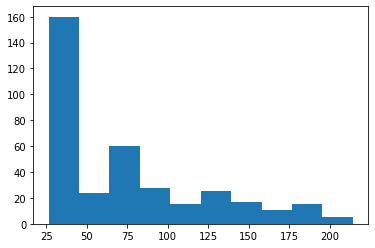

In [10]:
plt.hist(df.Price)

In [11]:
# changing month variable type to datatime dtype

In [12]:
df['Month'] = pd.to_datetime(df['Month'])
df['year'] = pd.DatetimeIndex(df['Month']).year
df['month'] = pd.DatetimeIndex(df['Month']).month

In [13]:
df["Month"]


2     1992-01-01
14    1993-01-01
26    1994-01-01
38    1995-01-01
50    1996-01-01
         ...    
301   2016-01-12
313   2017-01-12
325   2018-01-12
337   2019-01-12
349   2020-01-12
Name: Month, Length: 360, dtype: datetime64[ns]

In [14]:
df.sort_values('Month',ascending=True,inplace=True)
df.head()

,Month,Price,Change,year,month
0,1991-01-11,34.76,-,1991,1
1,1991-01-12,34.76,0.00%,1991,1
2,1992-01-01,33.10,-4.78%,1992,1
3,1992-01-02,33.10,0.00%,1992,1
4,1992-01-03,33.10,0.00%,1992,1


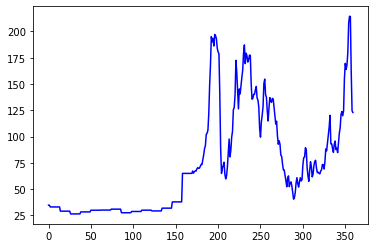

In [15]:
plt.plot(df.Price,'b')

In [16]:
df.Change.value_counts()

0.00%      157
-1.60%       2
-7.47%       2
1.35%        1
0.53%        1
          ... 
-1.53%       1
-24.27%      1
4.25%        1
4.46%        1
-0.14%       1
Name: Change, Length: 202, dtype: int64

In [17]:
df.Change.describe()

count       360
unique      202
top       0.00%
freq        157
Name: Change, dtype: object

In [18]:
df = df.set_index('Month')
df.head()

,Price,Change,year,month
Month,,,,
1991-01-11,34.76,-,1991,1
1991-01-12,34.76,0.00%,1991,1
1992-01-01,33.10,-4.78%,1992,1
1992-01-02,33.10,0.00%,1992,1
1992-01-03,33.10,0.00%,1992,1


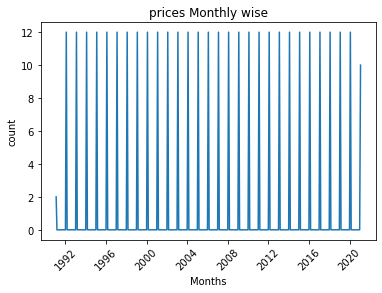

In [19]:
plt.plot(df.Price.resample('M').count())
plt.xticks(rotation=45)
plt.title('prices Monthly wise')
plt.xlabel('Months')
plt.ylabel('count')
plt.show()

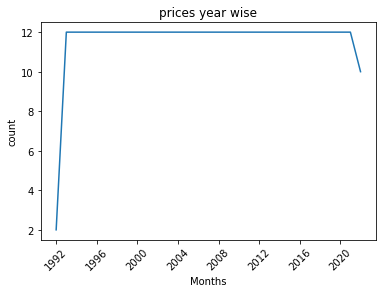

In [20]:
plt.plot(df.Price.resample('Y').count())
plt.xticks(rotation=45)
plt.title('prices year wise')
plt.xlabel('Months')
plt.ylabel('count')
plt.show()

(array([160.,  24.,  60.,  28.,  15.,  25.,  17.,  11.,  15.,   5.]),
 array([ 26.47 ,  45.266,  64.062,  82.858, 101.654, 120.45 , 139.246,
        158.042, 176.838, 195.634, 214.43 ]),
 <BarContainer object of 10 artists>)

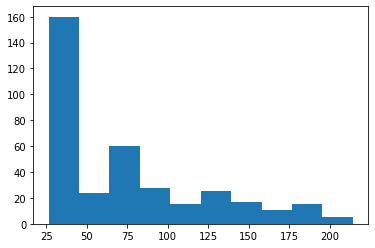

In [21]:
plt.hist(df.Price)

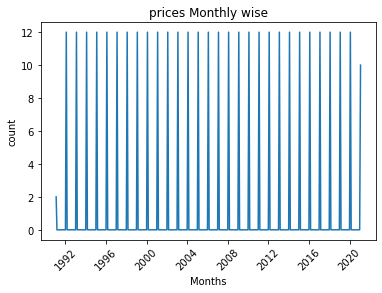

In [22]:
plt.plot(df.Change.resample('M').count())
plt.xticks(rotation=45)
plt.title('prices Monthly wise')
plt.xlabel('Months')
plt.ylabel('count')
plt.show()

In [23]:
df1=df.Price

In [24]:
df1=pd.DataFrame(df1)

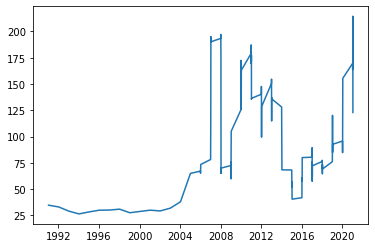

In [25]:
plt.plot(df1)

Text(0.5, 1.0, 'Histogram of df1 Data')

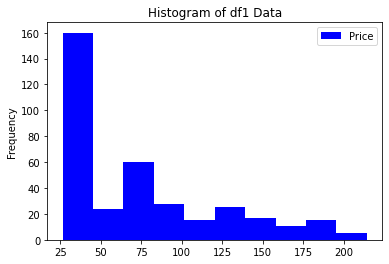

In [26]:
df1.plot(kind='hist',facecolor='b')
plt.title('Histogram of df1 Data')

Text(0.5, 1.0, 'Density plot of df1 Data')

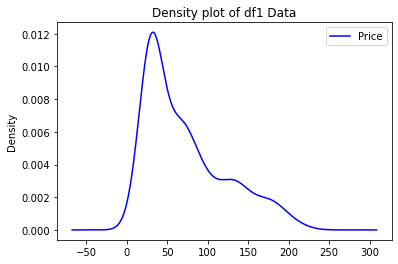

In [27]:
df1.plot(kind='kde',color='b')
plt.title('Density plot of df1 Data')

Text(0.5, 1.0, 'Boxplot of ironore Data')

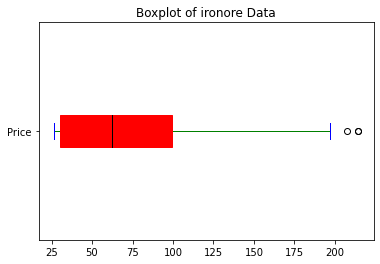

In [28]:
props2=dict(boxes='red',whiskers='green',medians='black',caps='blue')
df1.plot.box(color=props2,patch_artist=True,vert=False)
plt.title('Boxplot of ironore Data')

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decom=seasonal_decompose(df1,period=1,model='mul')

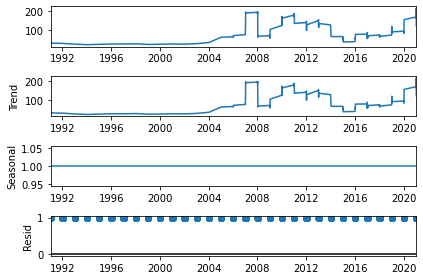

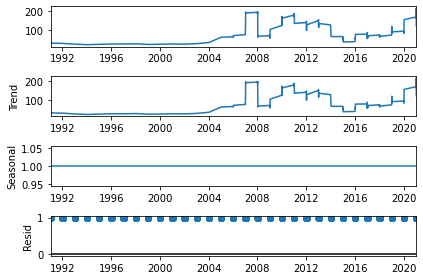

In [30]:
decom.plot()

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decoma=seasonal_decompose(df1,period=1,model='add')

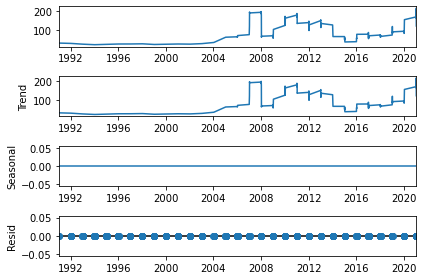

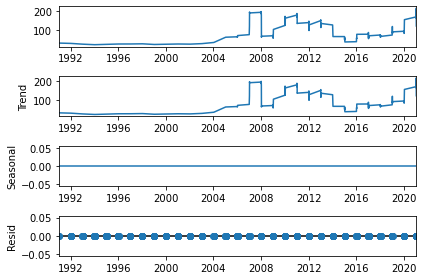

In [32]:
decoma.plot()

In [33]:
from statsmodels.tsa.stattools import adfuller
df1_adf=adfuller(df1)

In [34]:
df1_adf

(-2.08071630165627,
 0.2523390317583961,
 2,
 357,
 {'1%': -3.44880082033912,
  '5%': -2.869670179576637,
  '10%': -2.5711012838861036},
 2408.6137545944557)

In [35]:
# data is not sationary 

In [36]:
!pip install pmdarima


In [37]:
from pmdarima import auto_arima 
model = auto_arima(df1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  360
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1254.675
Date:                Mon, 20 Dec 2021   AIC                           2513.351
Time:                        04:19:38   BIC                           2521.117
Sample:                             0   HQIC                          2516.439
                                - 360                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4008      0.028     14.213      0.000       0.346       0.456
sigma2        63.5258      2.018     31.478      0.000      59.570      67.481
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):              1367.32
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):             190.58   Skew:                            -1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
mod_res=model.resid()
mod_res

array([ 3.47600000e+01, -8.85013932e-04, -1.65969437e+00,  6.50771272e-01,
       -2.59935223e-01,  1.04129581e-01, -4.17337131e-02,  1.67275632e-02,
       -6.70476547e-03,  2.68741879e-03, -1.07717742e-03,  4.31756772e-04,
       -1.73057760e-04,  6.93654163e-05, -4.01002780e+00,  1.60730873e+00,
       -6.44245247e-01,  2.58227888e-01, -1.03503506e-01,  4.14865177e-02,
       -1.66287231e-02,  6.66516373e-03, -2.67154653e-03,  1.07081553e-03,
       -4.29206788e-04,  1.72035669e-04, -2.62006896e+00,  1.05018217e+00,
       -4.20936476e-01,  1.68720744e-01, -6.76270434e-02,  2.71064298e-02,
       -1.08648626e-02,  4.35487968e-03, -1.74553307e-03,  6.99648649e-04,
       -2.80434809e-04,  1.12404537e-04,  1.90995495e+00, -7.65552612e-01,
        3.06850590e-01, -1.22992572e-01,  4.92981704e-02, -1.97598081e-02,
        7.92017252e-03, -3.17458209e-03,  1.27244342e-03, -5.10023751e-04,
        2.04428914e-04, -8.19396757e-05,  1.62003284e+00, -6.49345356e-01,
        2.60272126e-01, -

In [39]:
mod_res1=pd.DataFrame(mod_res,index=df1.index)
mod_res1

,0
Month,
1991-01-11,34.760000
1991-01-12,-0.000885
1992-01-01,-1.659694
1992-01-02,0.650771
1992-01-03,-0.259935
...,...
2021-01-06,-3.057629
2021-01-07,0.935566
2021-01-08,-52.354996


Text(0.5, 1.0, 'Histogram of residuals')

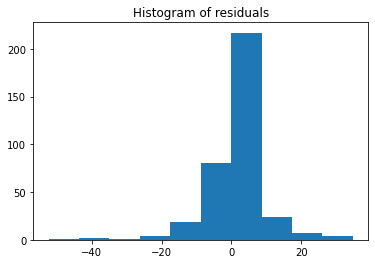

In [40]:
plt.hist(mod_res1)
plt.title('Histogram of residuals')

In [41]:
mod_sqe=pow(mod_res1,2) #squaring of errors
mod_sqe.head()

,0
Month,
1991-01-11,1.208258e+03
1991-01-12,7.832497e-07
1992-01-01,2.754585e+00
1992-01-02,4.235032e-01
1992-01-03,6.756632e-02


In [42]:
mod_mse=(mod_sqe.sum())/len(mod_sqe)
mod_mse

0    66.707282
dtype: float64

In [43]:
mod_rmse=sqrt(mod_mse)
mod_rmse

8.167452627190782

In [44]:
df1.Price.mean()

72.32580555555558

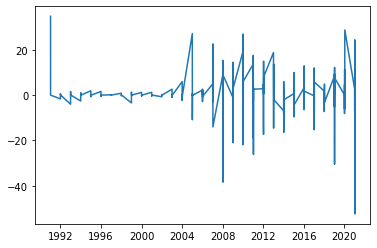

In [45]:
plt.plot(mod_res1)

In [46]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

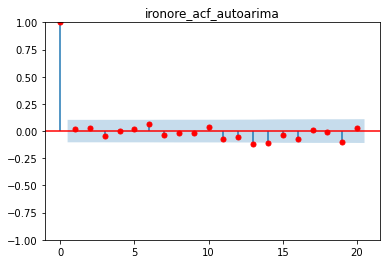

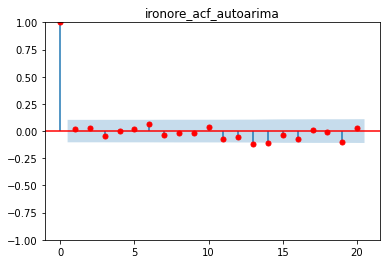

In [47]:
plot_acf(mod_res1,lags=20,color='r',title='ironore_acf_autoarima')

C:\Users\saina\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


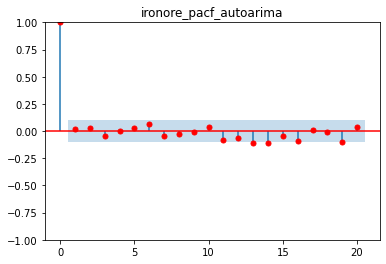

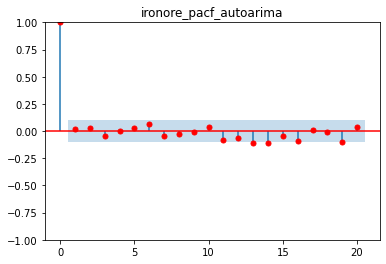

In [48]:
plot_pacf(mod_res1,lags=20,color='r',title='ironore_pacf_autoarima')

In [49]:
mod_pred=model.predict(n_periods=24)
mod_pred

array([124.94043582, 124.94043582, 124.94043582, 124.94043582,
       124.94043582, 124.94043582, 124.94043582, 124.94043582,
       124.94043582, 124.94043582, 124.94043582, 124.94043582,
       124.94043582, 124.94043582, 124.94043582, 124.94043582,
       124.94043582, 124.94043582, 124.94043582, 124.94043582,
       124.94043582, 124.94043582, 124.94043582, 124.94043582])

In [50]:
df1.tail()

,Price
Month,
2021-01-06,214.43
2021-01-07,214.14
2021-01-08,162.16
2021-01-09,124.52
2021-01-10,122.91


In [51]:
mod_pred=pd.DataFrame(mod_pred,index=pd.date_range(start='2021-02-10',periods=24,freq='MS'))

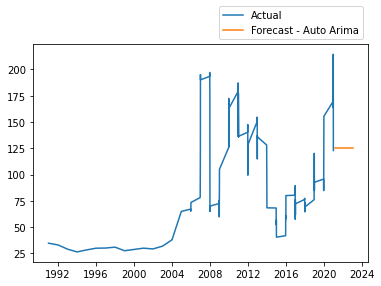

In [52]:
plt.plot(df1)
plt.plot(mod_pred)
plt.legend(['Actual','Forecast - Auto Arima'],bbox_to_anchor=(1,1),loc=4)
plt.show()

In [53]:
# to make data stationary there are methods called 1) differencing, 2) rolling window, 3) Transformation

In [54]:
# Differencing is a method of inducing a lag in the data which will remove the seasonal or cyclical patterns from the data